#   <center>Week 2: Linear Regression frow scratch </center>

-----------

<strong>Objective</strong>: To build a <strong>univariate linear regression model</strong> that can predict profit given population size.

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for <strong>profits</strong> and <strong>populations</strong> from the cities.

You would like to use this data to help you select which city to expand to next.



---------------

# 1.  Load data

To load and plot the data, three python libraries(Numpy, Pandas and Matplotlib) should be used. The libraries are first imported in the codeblock below.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The file <strong>ex1data1.txt</strong> contains the dataset for our linear regression problem. The <strong>first column</strong> is the <strong>population</strong> of a city and the </strong>second column</strong> is the <strong>profit</strong> of a food truck in that city. A negative value for profit indicates a loss.

In [2]:
# Load dataset
column_names = ["Population","Profit"]  
data = pd.read_csv('ex1data1.txt', names = column_names)

- Data shape

In [3]:
print('data shape: {}, column size: {}, row size: {}' \
      .format(data.shape, data.shape[0], data.shape[1]))

data shape: (97, 2), column size: 97, row size: 2


-  Display 5 random samples

In [4]:
data.sample(5)

,Population,Profit
25,18.9450,22.6380
48,11.7000,8.0043
43,5.7737,2.4406
71,7.3345,4.0259
33,5.8918,1.8495


- First 5 samples

In [5]:
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


- Last 5 samples

In [6]:
data.tail(5)

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


----------

# 2. Exploratory Data Analysis

In [7]:
#Data Summary
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [8]:
# Correlation 
corr = data.corr()
corr.style.background_gradient(cmap='Spectral')

,Population,Profit
Population,1,0.837873
Profit,0.837873,1


In [9]:
# Covariance
cov = data.cov()
cov.style.background_gradient(cmap='Spectral')

,Population,Profit
Population,14.976,17.8669
Profit,17.8669,30.363


-----

## 2.1. Visualization 

It is a good practice to visualize your data before building a model. The aim of data visualization is to give you an insight on the problem. We will be using <strong>matplotlib</strong>  and <strong>seaborn</strong> libracy for visuals.

- Boxplot

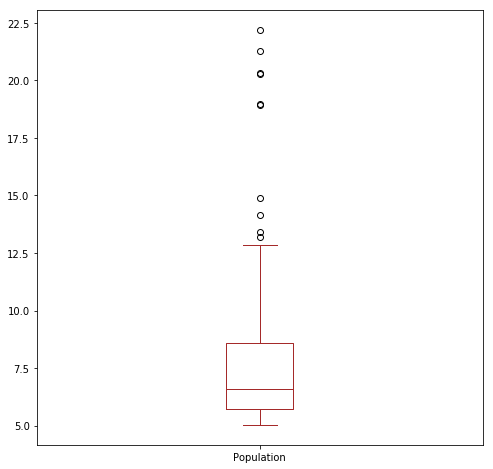

In [10]:
data.Population.plot(kind='box', figsize=(8,8), color='brown')

- Histogram

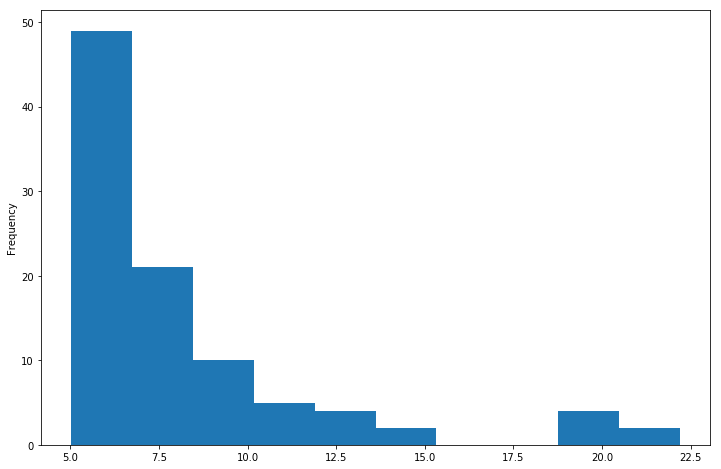

In [11]:
data.Population.plot(kind='hist', figsize=(12,8))

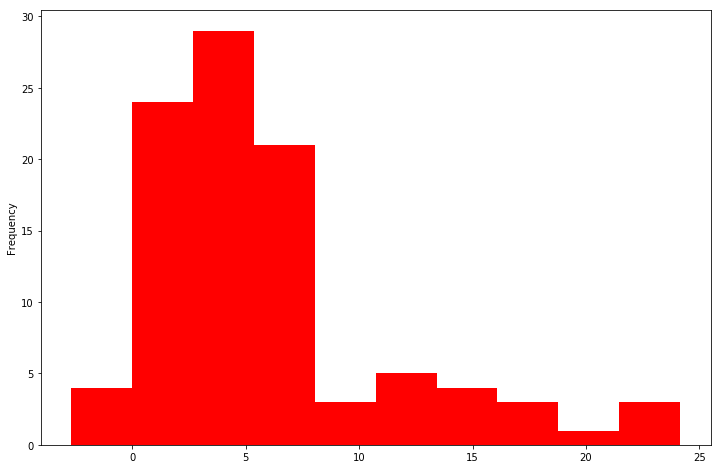

In [12]:
data.Profit.plot(kind='hist', figsize=(12,8), color='red')

- Scatterplot

Text(0, 0.5, 'Profit in $10,000s')

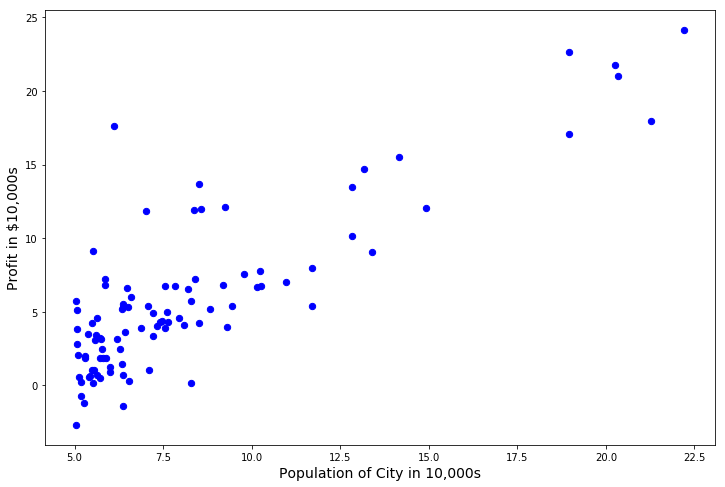

In [13]:
# scatterplot
data.plot(kind = 'scatter', x = 'Population', y = 'Profit',
          s= 40, color = 'blue', figsize=(12,8))

# labels
plt.xlabel('Population of City in 10,000s', fontsize = 14)
plt.ylabel('Profit in $10,000s', fontsize =14)

-----

# 3. Problem Formulation

From the exploratory data analysis we can observe there is a positive correlation between the two variables. This means that we can develop a model that will be able to make reasonable predictions

We have 97 training examples and one independent variable `x` on the first column and one dependent variable `y` on the second column

**Recall:**
- Our untrained model is given by: ![title](img/model.gif)
    
- Which you can also be written as ![title](img/model2.gif)

where:
- `x` is the input values
- `y` is the ground truth or actual values
- `theta` is the <strong>weight or learnable<strong> parameters  



In [14]:
# input values - xs and 1s
nrows = data.shape[0]
ncols = data.shape[1]

x = data.loc[:, 'Population'].values #converts to Numpy array
x = x.reshape(nrows, 1)  # Alternatively x.reshape(-1,1)

In [15]:
x.shape

(97, 1)

Because `x_0` is `1`, we want to create a `97 x 2` matrix that contains the input values on the first column and ones in the second column.

In [16]:
one_stack = np.ones((nrows,1))
x_stack = np.hstack((x, one_stack))

In [17]:
x_stack[:3]

array([[6.1101, 1.    ],
       [5.5277, 1.    ],
       [8.5186, 1.    ]])

In [18]:
# output variable
y = data.loc[:, 'Profit'].values # converts to Numpy array
y = y.reshape(nrows,1)

In [19]:
y.shape

(97, 1)

# 4. Model Building

Recall from the class, the process to training a linear regression model is as follow.

We want to find the appropriate value of `theta` that will give us a good estimate of a city's profit if lthe city's population is supplied.

To do this, 
- We want to start with a random value of `theta` to generate a hypothesis
![title](img/model3.gif)

- Then continually correct values of `theta` until the deviation of the hypothesis/prediction `h` from the ground-truth `y` is greatly reduced

**Note:** 
- Matrix multiplication was utilized for the calculation. 

In [20]:
def train(x,y):
    print_every = 50 
    iteration = 2500
    
    # Zero initialization of parameters 
    theta = [[0],[0]]
    
    # Here, want to save our cost function or loss or square error, 
    # so that we can have an idea of how the deviation of the hypothesis from the ground thruth reduces
    cost_function = np.zeros(iteration)
    
    for i in range(0, iteration):
        # Step 1: we make a prediction using the random weights (theta) that we initialized
        # @ is a fancy way do performing dot products
        h = x @ theta
        
        # Step 2: We take a step to correct the weights (theta) to that the next predicion will be better
        theta = update_weight(h, theta, x)
        
        # Step 3: We measure the deviation or error
        cost_function[i] = cost(x, theta)
        
        # Display result every 50 iterations
        if i % print_every  == 0:
            print("Iteration: {}, Cost function: {} ".format(i, cost_function[i]))
    
    return theta, cost_function

But how do we check the error like we defined above?

Remember the error formular (cost function)? 
![title](img/model44.gif)

where:
- `m` is the number of training example
- `x` is the input data
- `h` is the hypothesis
- `y` is the prediction

The equation tries to find the square error between the ground truth and the prediction.



In [21]:
def cost(x, theta):
    m = nrows
    h = x @ theta
    return (1/(2 * m)) * np.sum(np.square(h - y))

Now that we are able to get a sense of the error, how do we update how weight (theta) such that is predicts better?

Like we discussed in class, gradient descent algorithim will be used for this purpose.

The general formular for gradient is given below:
![title](img/model6.gif)
which can be differentiated to give:
![title](img/model5.gif)
where
- alpha is the <strong>learning rate</strong>

ie: we continually update the weight(theta) by taking steps(alpha) for the derived gradient of the error until we have sufficiently minimized theta.

In [22]:
def update_weight(h, theta, x):
    m = nrows
    alpha = 0.01
    theta = theta - alpha * (1 / m * ( x.T @ (h - y)))
    return theta

- Now, lets pass in our data and train.

In [23]:
theta, cost_values = train(x_stack,y)

Iteration: 0, Cost function: 6.737190464870006 
Iteration: 50, Cost function: 5.673965480401506 
Iteration: 100, Cost function: 5.476362817272741 
Iteration: 150, Cost function: 5.311380876611356 
Iteration: 200, Cost function: 5.173634551165021 
Iteration: 250, Cost function: 5.05862772012701 
Iteration: 300, Cost function: 4.962606493117519 
Iteration: 350, Cost function: 4.88243668100122 
Iteration: 400, Cost function: 4.8155014941166865 
Iteration: 450, Cost function: 4.759616128727925 
Iteration: 500, Cost function: 4.712956453749759 
Iteration: 550, Cost function: 4.673999470039924 
Iteration: 600, Cost function: 4.6414735988143185 
Iteration: 650, Cost function: 4.614317176570121 
Iteration: 700, Cost function: 4.591643801766726 
Iteration: 750, Cost function: 4.572713402159866 
Iteration: 800, Cost function: 4.5569080784097515 
Iteration: 850, Cost function: 4.543711935484407 
Iteration: 900, Cost function: 4.532694243543437 
Iteration: 950, Cost function: 4.523495378663532 
It

In [24]:
# Now, lets see our cost_values
cost_values

array([6.73719046, 5.93159357, 5.90115471, ..., 4.47714649, 4.47714586,
       4.47714523])

In [25]:
cost_values

array([6.73719046, 5.93159357, 5.90115471, ..., 4.47714649, 4.47714586,
       4.47714523])

In [26]:
# Now, lets see our trained weights
print('Our learned value of theta: ',theta.ravel())

Our learned value of theta:  [ 1.18864349 -3.85208068]


In [27]:
theta.shape

(2, 1)

In [28]:
theta.ravel().shape # Alternatively theta.squeeze().shape

(2,)

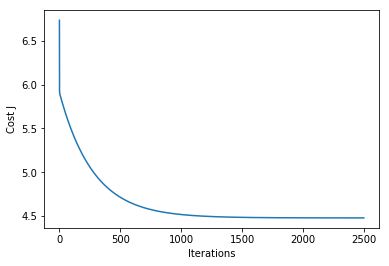

In [29]:
plt.plot(cost_values)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

Notice that at the `1500th iteration`, the model doesnt really change anymore. You should actually stop the iteration at that time and save cost of processing

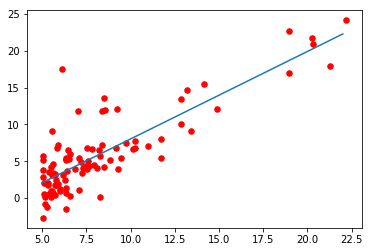

In [30]:
x_plot = np.arange(5,23)
y_plot = theta[0]*x_plot + theta[1]
# Plot gradient descent
plt.scatter(x[:,0], y, s=30, c='r', marker='o', linewidths=1)
plt.plot(x_plot,y_plot, label='Linear regression (Gradient descent)')

---------------

## 5. Prediction 

Here, I hard coded the learned weights in the model that we defined earlier.
![Title](img/model.gif)

In [133]:
def predict():
    input_ = float(input('Enter the population size(10,000): '))
    print("For a population of {}, the estimated profit is ${}".format(input_, input_ * 1.18864349))
# +3.85208068) )

In [134]:
predict()

Enter the population size(10,000): 5.2
For a population of 5.2, the estimated profit is $6.180946148


----------------------

# Assignment


1. Use `scikit-learn` to develop a linear regression model using the same dataset in this practice and compare result.
2. Apply data normalization and compare the your solution with the  above result.
3. Rewrite the train function such that we pass   `'iteration', 'print_every' and 'alpha'` as arguments.


Assignment is due for submission on `26/09/2019`.

Summission link will be posted on the `SLACK CHANNEL/MAIL`?

In [33]:
data.head(2)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302


In [34]:
data.corr()

,Population,Profit
Population,1.000000,0.837873
Profit,0.837873,1.000000


In [35]:
X_skl = data[['Population']]

In [36]:
X_skl.shape

(97, 1)

In [37]:
y_skl = data['Profit']
y_skl.shape

(97,)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
                        X_skl, y_skl, test_size=0.3, random_state = 42)

In [40]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import metrics

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [42]:
predictions = model.predict(X_test)

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.1571749083230705
MSE: 11.267369947225893
RMSE: 3.35669032638191


In [114]:
print(model.intercept_)

-4.652901833002952


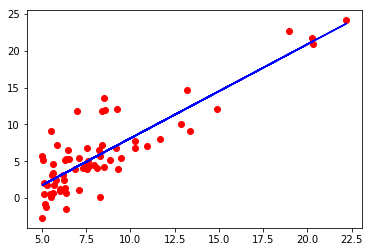

In [44]:
plt.scatter(X_train, y_train, color = 'red')
#plot regrssion line
plt.plot(X_train, model.predict(X_train), color = 'blue')

plt.show()

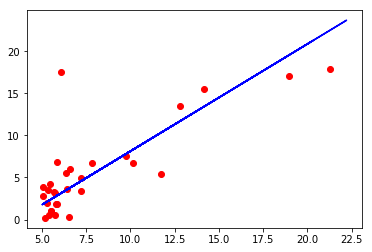

In [45]:
plt.scatter(X_test, y_test, color = 'red')
#plot regrssion line
plt.plot(X_train, model.predict(X_train), color = 'blue')

In [46]:

final_predictions = np.exp(predictions)
print ('Original predictions are: \n ', predictions[:5],'\n')
print ('Final predictions are: \n', final_predictions[:5])

Original predictions are: 
  [22.53233987  2.25474812  2.12507558  3.56131077  1.97560082] 

Final predictions are: 
 [6.10479197e+09 9.53289187e+00 8.37353032e+00 3.52093183e+01
 7.21095087e+00]


In [84]:
result = np.array([predictions, y_test])
print(result)

[[22.53233987  2.25474812  2.12507558  3.56131077  1.97560082  7.82721803
  19.56839604 10.30479401  2.64287145  3.15312972  3.76546518  3.71244636
   2.75874633 11.73566345  5.34363751  2.83335595  2.36104128  2.67263865
   1.81079533  4.57863339  2.42683572  8.29646655  2.37292261  2.21961517
   3.46396055  2.87423793  1.80466303  2.66650635 13.44248627  4.56879616]
 [17.929       0.55657     1.9869      3.6518      0.20421     7.5435
  17.054       5.3854      3.2522     17.592       5.9966      0.29678
   1.844      13.501       6.7318      6.8233      4.263       3.1551
   2.8214      3.3411      1.0179      6.6799      1.0173      3.5129
   5.4974      1.8495      3.8166      0.47953    15.505       4.8852    ]]


In [126]:
test_df = pd.DataFrame(X_test)
test_df['y_test'] = y_test
test_df['y_pred'] = predictions
test_df['y_predstd'] = predictions2
test_df['y_predxstd'] = predictions3
test_df['y_predn'] = predictions1

In [127]:
test_df.head()

,Population,y_test,y_pred,y_predstd,y_predxstd,y_predn
62,21.2790,17.92900,22.532340,22.532340,22.532340,6.060484
40,5.4069,0.55657,2.254748,2.254748,2.254748,6.060484
93,5.3054,1.98690,2.125076,2.125076,2.125076,6.060484
18,6.4296,3.65180,3.561311,3.561311,3.561311,6.060484
81,5.1884,0.20421,1.975601,1.975601,1.975601,6.060484


from the above result, it can be deduced that the normalizer could not function well in this model and standardscaller got the same result as using the normal data without scaling.

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
StandSc = StandardScaler()

In [91]:
StandSc = StandSc.fit(X_skl)
X_StandSc = StandSc.transform(X_skl)

In [92]:
X_StandSc

array([[-0.53240565],
       [-0.68368294],
       [ 0.09319761],
       [-0.30042464],
       [-0.5974206 ],
       [ 0.0579498 ],
       [-0.17751184],
       [ 0.10865262],
       [-0.4347144 ],
       [-0.80656976],
       [-0.63614904],
       [ 1.55957946],
       [-0.63009691],
       [ 0.06457337],
       [-0.6543314 ],
       [-0.72220358],
       [-0.46609197],
       [-0.78695878],
       [-0.44941614],
       [-0.28286567],
       [-0.51188555],
       [ 3.14560127],
       [-0.69344947],
       [-0.47630007],
       [-0.67402031],
       [ 2.80143506],
       [ 1.21255602],
       [ 0.72656735],
       [ 1.30294835],
       [ 3.64769432],
       [-0.75519159],
       [-0.40790839],
       [ 0.28270982],
       [-0.58910866],
       [ 0.01332508],
       [-0.05880697],
       [-0.0165979 ],
       [-0.66326674],
       [ 1.214634  ],
       [-0.46920894],
       [-0.71506051],
       [-0.33177623],
       [ 0.92163816],
       [-0.61978491],
       [-0.08704158],
       [-0

In [93]:
X_sctrain, X_sctest, y_sctrain, y_sctest = train_test_split(
                        X_StandSc, y_skl, test_size=0.3, random_state = 42)

In [94]:
lr2= linear_model.LinearRegression()
model2 = lr2.fit(X_sctrain, y_sctrain)

In [95]:
predictions2 = model2.predict(X_sctest)

In [96]:
print('MAE:', metrics.mean_absolute_error(y_sctest, predictions2))
print('MSE:', metrics.mean_squared_error(y_sctest, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_sctest, predictions2)))

MAE: 2.157174908323071
MSE: 11.267369947225896
RMSE: 3.3566903263819103


In [111]:
print(model2.intercept_)

5.771748537917262


In [97]:
result = np.array([predictions2, y_sctest])
print(result)

[[22.53233987  2.25474812  2.12507558  3.56131077  1.97560082  7.82721803
  19.56839604 10.30479401  2.64287145  3.15312972  3.76546518  3.71244636
   2.75874633 11.73566345  5.34363751  2.83335595  2.36104128  2.67263865
   1.81079533  4.57863339  2.42683572  8.29646655  2.37292261  2.21961517
   3.46396055  2.87423793  1.80466303  2.66650635 13.44248627  4.56879616]
 [17.929       0.55657     1.9869      3.6518      0.20421     7.5435
  17.054       5.3854      3.2522     17.592       5.9966      0.29678
   1.844      13.501       6.7318      6.8233      4.263       3.1551
   2.8214      3.3411      1.0179      6.6799      1.0173      3.5129
   5.4974      1.8495      3.8166      0.47953    15.505       4.8852    ]]


In [98]:
from sklearn import preprocessing #import Normalize
X_Norm =preprocessing.normalize(X_skl)
#X_Norm = Norm.fit_transform(X_skl)
print(X_Norm.shape)
print ('\n')
print (X_Norm)

(97, 1)


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [99]:
X_Ntrain, X_Ntest, y_Ntrain, y_Ntest = train_test_split(
                        X_Norm, y_skl, test_size=0.3)

In [100]:
lr1= linear_model.LinearRegression()
model1 = lr1.fit(X_Ntrain, y_Ntrain)

In [101]:
predictions1 = model1.predict(X_Ntest)

In [102]:
print('MAE:', metrics.mean_absolute_error(y_Ntest, predictions1))
print('MSE:', metrics.mean_squared_error(y_Ntest, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_Ntest, predictions1)))

MAE: 5.021430492537314
MSE: 38.69564745952323
RMSE: 6.220582565927667


In [112]:
print(model1.intercept_)

6.060483731343284


In [103]:
predictions1

array([6.06048373, 6.06048373, 6.06048373, 6.06048373, 6.06048373,
       6.06048373, 6.06048373, 6.06048373, 6.06048373, 6.06048373,
       6.06048373, 6.06048373, 6.06048373, 6.06048373, 6.06048373,
       6.06048373, 6.06048373, 6.06048373, 6.06048373, 6.06048373,
       6.06048373, 6.06048373, 6.06048373, 6.06048373, 6.06048373,
       6.06048373, 6.06048373, 6.06048373, 6.06048373, 6.06048373])

In [104]:
result1 = np.array([predictions1, y_Ntest])

In [105]:
result1

array([[ 6.06048373,  6.06048373,  6.06048373,  6.06048373,  6.06048373,
         6.06048373,  6.06048373,  6.06048373,  6.06048373,  6.06048373,
         6.06048373,  6.06048373,  6.06048373,  6.06048373,  6.06048373,
         6.06048373,  6.06048373,  6.06048373,  6.06048373,  6.06048373,
         6.06048373,  6.06048373,  6.06048373,  6.06048373,  6.06048373,
         6.06048373,  6.06048373,  6.06048373,  6.06048373,  6.06048373],
       [10.117     ,  0.29678   , 11.854     ,  1.0173    ,  5.3436    ,
         2.0576    , 17.929     ,  4.2959    ,  4.6042    ,  0.92695   ,
         3.0825    ,  3.3411    , 12.134     ,  2.4406    ,  0.55657   ,
        21.767     ,  1.2784    ,  5.7442    ,  1.8495    ,  5.1337    ,
        20.992     ,  7.2029    ,  0.14454   ,  9.1302    ,  1.8396    ,
         0.20421   , -2.6807    ,  8.0043    , -0.74279   ,  0.47953   ]])

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_trainS = scaler.transform(X_train)

In [107]:
X_testS = scaler.transform(X_test)

In [108]:
lr3= linear_model.LinearRegression()
model3 = lr3.fit(X_trainS, y_train)
predictions3 = model3.predict(X_testS)

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions3))
print('MSE:', metrics.mean_squared_error(y_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

MAE: 2.157174908323071
MSE: 11.267369947225895
RMSE: 3.3566903263819103


In [113]:
print(model3.intercept_)

5.943361343283584


In [110]:
result3 = np.array([predictions3, y_test])
print(result3)

[[22.53233987  2.25474812  2.12507558  3.56131077  1.97560082  7.82721803
  19.56839604 10.30479401  2.64287145  3.15312972  3.76546518  3.71244636
   2.75874633 11.73566345  5.34363751  2.83335595  2.36104128  2.67263865
   1.81079533  4.57863339  2.42683572  8.29646655  2.37292261  2.21961517
   3.46396055  2.87423793  1.80466303  2.66650635 13.44248627  4.56879616]
 [17.929       0.55657     1.9869      3.6518      0.20421     7.5435
  17.054       5.3854      3.2522     17.592       5.9966      0.29678
   1.844      13.501       6.7318      6.8233      4.263       3.1551
   2.8214      3.3411      1.0179      6.6799      1.0173      3.5129
   5.4974      1.8495      3.8166      0.47953    15.505       4.8852    ]]


------------------

## Credit

This exercise is adapted from [Andrew Ng Machine Learning Course](https://www.coursera.org/learn/machine-learning).